In [373]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import rasterio
from rasterio.mask import mask
from rasterio import plot
from rasterio.plot import show
import requests
import json
import plotly.graph_objects as go

%matplotlib inline

# Get the address

In [378]:
introduction_message = print("Due to connection errors please choose an address from the zones 1,3,7,22,43. Thank you for your understanding.")
postcode = input("Enter the postcode of the address and hit enter: ")
streetname = input("Enter the streetname of the address and hit enter: ")
house_number = input("Enter the house number of the address and hit enter: ")

Due to connection errors please choose an address from the zones 1,3,7,22,43. Thank you for your understanding.


KeyboardInterrupt: Interrupted by user

In [377]:
#Double-check the address
print("Postcode: ", postcode)
print("Streetname: ", streetname)
print("House number: ", house_number)

Postcode:  9260
Streetname:  Bohemen
House number:  64


In [338]:
#Get a request from the api to get information about the house
r = requests.get(
    "https://api.basisregisters.vlaanderen.be/v1/adresmatch", params={"postcode":int(postcode), "straatnaam":streetname, "huisnummer":int(house_number) }
)
house_info_nested = json.loads(r.content)
print(house_info_nested)

{'adresMatches': [{'identificator': {'id': 'https://data.vlaanderen.be/id/adres/329127',
    'naamruimte': 'https://data.vlaanderen.be/id/adres',
    'objectId': '329127',
    'versieId': '2016-02-01T10:24:37+01:00'},
   'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/329127',
   'gemeente': {'objectId': '42026',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/gemeenten/42026',
    'gemeentenaam': {'geografischeNaam': {'spelling': 'Wichelen',
      'taal': 'nl'}}},
   'postinfo': {'objectId': '9260',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/postinfo/9260'},
   'straatnaam': {'objectId': '66426',
    'detail': 'https://api.basisregisters.vlaanderen.be/v1/straatnamen/66426',
    'straatnaam': {'geografischeNaam': {'spelling': 'Bohemen', 'taal': 'nl'}}},
   'huisnummer': '64',
   'volledigAdres': {'geografischeNaam': {'spelling': 'Bohemen 64, 9260 Wichelen',
     'taal': 'nl'}},
   'adresPositie': {'point': {'coordinates': [122893.7, 188164.09]

In [339]:
type(house_info_nested)

dict

In [340]:
house_info = pd.json_normalize(house_info_nested)

In [341]:
df = pd.json_normalize(house_info.adresMatches[0][0])
print(df)

,detail,huisnummer,positieSpecificatie,positieGeometrieMethode,adresStatus,officieelToegekend,adresseerbareObjecten,score,identificator.id,identificator.naamruimte,...,postinfo.objectId,postinfo.detail,straatnaam.objectId,straatnaam.detail,straatnaam.straatnaam.geografischeNaam.spelling,straatnaam.straatnaam.geografischeNaam.taal,volledigAdres.geografischeNaam.spelling,volledigAdres.geografischeNaam.taal,adresPositie.point.coordinates,adresPositie.point.type
0,https://api.basisregisters.vlaanderen.be/v1/ad...,64,gebouweenheid,aangeduidDoorBeheerder,inGebruik,True,"[{'objectType': 'gebouweenheid', 'objectId': '...",100.0,https://data.vlaanderen.be/id/adres/329127,https://data.vlaanderen.be/id/adres,...,9260,https://api.basisregisters.vlaanderen.be/v1/po...,66426,https://api.basisregisters.vlaanderen.be/v1/st...,Bohemen,nl,"Bohemen 64, 9260 Wichelen",nl,"[122893.7, 188164.09]",Point


In [342]:
dff = pd.json_normalize(df.adresseerbareObjecten[0][0])
dff

,objectType,objectId,detail
0,gebouweenheid,14426969,https://api.basisregisters.vlaanderen.be/v1/ge...


In [343]:
dff.detail[0]

'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/14426969'

In [344]:
r = requests.get(dff.detail[0])
house_gebouweenheden_nested = json.loads(r.content)
print(house_gebouweenheden_nested)

{'identificator': {'id': 'https://data.vlaanderen.be/id/gebouweenheid/14426969', 'naamruimte': 'https://data.vlaanderen.be/id/gebouweenheid', 'objectId': '14426969', 'versieId': '2016-02-01T10:24:37+01:00'}, 'geometriePunt': {'point': {'coordinates': [122893.7, 188164.09], 'type': 'Point'}}, 'positieGeometrieMethode': 'aangeduidDoorBeheerder', 'gebouweenheidStatus': 'gerealiseerd', 'functie': 'nietGekend', 'gebouw': {'objectId': '14426710', 'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouwen/14426710'}, 'adressen': [{'objectId': '329127', 'detail': 'https://api.basisregisters.vlaanderen.be/v1/adressen/329127'}]}


In [345]:
type(house_gebouweenheden_nested)

dict

In [346]:
house_gebouweenheden = pd.json_normalize(house_gebouweenheden_nested)
house_gebouweenheden

,positieGeometrieMethode,gebouweenheidStatus,functie,adressen,identificator.id,identificator.naamruimte,identificator.objectId,identificator.versieId,geometriePunt.point.coordinates,geometriePunt.point.type,gebouw.objectId,gebouw.detail
0,aangeduidDoorBeheerder,gerealiseerd,nietGekend,"[{'objectId': '329127', 'detail': 'https://api...",https://data.vlaanderen.be/id/gebouweenheid/14...,https://data.vlaanderen.be/id/gebouweenheid,14426969,2016-02-01T10:24:37+01:00,"[122893.7, 188164.09]",Point,14426710,https://api.basisregisters.vlaanderen.be/v1/ge...


In [347]:
url_gebouwen = house_gebouweenheden['gebouw.detail'][0]

In [348]:
r = requests.get(url_gebouwen)
house_gebouw_nested = json.loads(r.content)
house_gebouw_nested

{'identificator': {'id': 'https://data.vlaanderen.be/id/gebouw/14426710',
  'naamruimte': 'https://data.vlaanderen.be/id/gebouw',
  'objectId': '14426710',
  'versieId': '2017-02-16T18:35:52+01:00'},
 'geometriePolygoon': {'polygon': {'coordinates': [[[122896.6095925197,
      188152.0293166563],
     [122899.43045651913, 188163.07270866632],
     [122898.90623252094, 188165.50106066465],
     [122898.90143252164, 188165.50234066695],
     [122897.465080522, 188165.89248466492],
     [122897.85919252038, 188167.3107886687],
     [122893.70412051678, 188168.4453166686],
     [122893.54277651757, 188168.4894126691],
     [122890.73887251318, 188157.6814126596],
     [122889.73503251374, 188153.8119086586],
     [122896.6095925197, 188152.0293166563]]],
   'type': 'Polygon'}},
 'geometrieMethode': 'ingemetenGRB',
 'gebouwStatus': 'gerealiseerd',
 'gebouweenheden': [{'objectId': '14426969',
   'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/14426969'}],
 'percelen': [

In [349]:
house_polygon_nested = house_gebouw_nested["geometriePolygoon"]
house_polygon_nested

{'polygon': {'coordinates': [[[122896.6095925197, 188152.0293166563],
    [122899.43045651913, 188163.07270866632],
    [122898.90623252094, 188165.50106066465],
    [122898.90143252164, 188165.50234066695],
    [122897.465080522, 188165.89248466492],
    [122897.85919252038, 188167.3107886687],
    [122893.70412051678, 188168.4453166686],
    [122893.54277651757, 188168.4894126691],
    [122890.73887251318, 188157.6814126596],
    [122889.73503251374, 188153.8119086586],
    [122896.6095925197, 188152.0293166563]]],
  'type': 'Polygon'}}

In [350]:
house_polygon = house_polygon_nested.get('polygon')

In [351]:
type(house_polygon)

dict

In [352]:
house_polygon

{'coordinates': [[[122896.6095925197, 188152.0293166563],
   [122899.43045651913, 188163.07270866632],
   [122898.90623252094, 188165.50106066465],
   [122898.90143252164, 188165.50234066695],
   [122897.465080522, 188165.89248466492],
   [122897.85919252038, 188167.3107886687],
   [122893.70412051678, 188168.4453166686],
   [122893.54277651757, 188168.4894126691],
   [122890.73887251318, 188157.6814126596],
   [122889.73503251374, 188153.8119086586],
   [122896.6095925197, 188152.0293166563]]],
 'type': 'Polygon'}

In [353]:
house_gebouw = pd.json_normalize(house_gebouw_nested)
house_gebouw

,geometrieMethode,gebouwStatus,gebouweenheden,percelen,identificator.id,identificator.naamruimte,identificator.objectId,identificator.versieId,geometriePolygoon.polygon.coordinates,geometriePolygoon.polygon.type
0,ingemetenGRB,gerealiseerd,"[{'objectId': '14426969', 'detail': 'https://a...","[{'objectId': '42026B0519-00M007', 'detail': '...",https://data.vlaanderen.be/id/gebouw/14426710,https://data.vlaanderen.be/id/gebouw,14426710,2017-02-16T18:35:52+01:00,"[[[122896.6095925197, 188152.0293166563], [122...",Polygon


In [354]:
house_polygon_list = house_gebouw['geometriePolygoon.polygon.coordinates'][0]

In [355]:
house_polygon_list

[[[122896.6095925197, 188152.0293166563],
  [122899.43045651913, 188163.07270866632],
  [122898.90623252094, 188165.50106066465],
  [122898.90143252164, 188165.50234066695],
  [122897.465080522, 188165.89248466492],
  [122897.85919252038, 188167.3107886687],
  [122893.70412051678, 188168.4453166686],
  [122893.54277651757, 188168.4894126691],
  [122890.73887251318, 188157.6814126596],
  [122889.73503251374, 188153.8119086586],
  [122896.6095925197, 188152.0293166563]]]

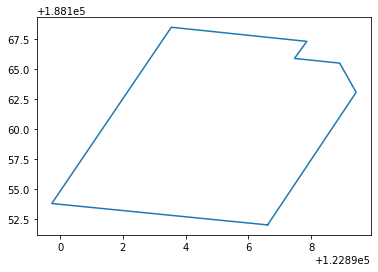

In [356]:
house_polygon_list[0].append((house_polygon_list[0])[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*house_polygon_list[0]) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show()

In [357]:
x_min_house = min(xs)
x_max_house = max(xs)
y_min_house = min(ys)
y_max_house = max(ys)

In [358]:
df_zone_bounds = pd.DataFrame(columns = ['xmin', 'ymin', 'xmax', 'ymax', 'zone'])
for zone in range(1,43):
    if zone < 10:
        if os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k0'+str(zone)+'.tif'):
            file = 'C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k0'+str(zone)+'.tif'
            raster = rasterio.open(file)
            xmin = raster.bounds.left
            ymin = raster.bounds.bottom
            xmax = raster.bounds.right
            ymax = raster.bounds.top
            bound = pd.DataFrame([[xmin, ymin, xmax, ymax, zone]], columns = ['xmin', 'ymin', 'xmax', 'ymax', 'zone'])
            df = pd.concat([df, bound])
    else:
        if os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k'+str(zone)+'.tif'):
            file = 'C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k'+str(zone)+'.tif'
            raster = rasterio.open(file)
            xmin = raster.bounds.left
            ymin = raster.bounds.bottom
            xmax = raster.bounds.right
            ymax = raster.bounds.top
            bound = pd.DataFrame([[xmin, ymin, xmax, ymax, zone]], columns = ['xmin', 'ymin', 'xmax', 'ymax', 'zone'])
            df = pd.concat([df, bound])

In [359]:
df.reset_index(drop=True, inplace=True)

In [360]:
df

,detail,huisnummer,positieSpecificatie,positieGeometrieMethode,adresStatus,officieelToegekend,adresseerbareObjecten,score,identificator.id,identificator.naamruimte,...,straatnaam.straatnaam.geografischeNaam.taal,volledigAdres.geografischeNaam.spelling,volledigAdres.geografischeNaam.taal,adresPositie.point.coordinates,adresPositie.point.type,xmin,ymin,xmax,ymax,zone
0,https://api.basisregisters.vlaanderen.be/v1/ad...,64,gebouweenheid,aangeduidDoorBeheerder,inGebruik,True,"[{'objectType': 'gebouweenheid', 'objectId': '...",100.0,https://data.vlaanderen.be/id/adres/329127,https://data.vlaanderen.be/id/adres,...,nl,"Bohemen 64, 9260 Wichelen",nl,"[122893.7, 188164.09]",Point,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,145000.0,238000.0,162000.0,247000.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,194000.0,238000.0,206000.0,248000.0,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,130000.0,218000.0,162000.0,238000.0,7.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,98000.0,178000.0,130000.0,198000.0,22.0


In [361]:
zone_bounds = df[(df['xmin']<x_min_house) & (df['xmax']>x_max_house) & (df['ymin']<y_min_house) & (df['ymax']>y_max_house)]

In [362]:
zone_bounds

,detail,huisnummer,positieSpecificatie,positieGeometrieMethode,adresStatus,officieelToegekend,adresseerbareObjecten,score,identificator.id,identificator.naamruimte,...,straatnaam.straatnaam.geografischeNaam.taal,volledigAdres.geografischeNaam.spelling,volledigAdres.geografischeNaam.taal,adresPositie.point.coordinates,adresPositie.point.type,xmin,ymin,xmax,ymax,zone
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,98000.0,178000.0,130000.0,198000.0,22.0


In [363]:
zone_number = int(zone_bounds.zone.iloc[0])

In [364]:
zone_number

22

In [365]:
if zone_number < 10:
    if os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k0'+str(zone_number)+'.tif') and os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDTMRAS1m_k0'+str(zone_number)+'.tif') :
        dsm_file = 'C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k0'+str(zone_number)+'.tif'
        with rasterio.open(dsm_file) as src_dsm:
            out_img_dsm, out_transform_dsm = rasterio.mask.mask(src_dsm, [house_polygon], crop=True)
            dsm = out_img_dsm[0]
        dtm_file = 'C:/Users/gulce/geoproject/k/DHMVIIDTMRAS1m_k0'+str(zone_number)+'.tif'
        with rasterio.open(dtm_file) as src_dtm:
            out_img_dsm, out_transform_dsm = rasterio.mask.mask(src_dtm, [house_polygon], crop=True)
            dtm = out_img_dtm[0]
else:
    if os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k'+str(zone_number)+'.tif') and os.path.isfile('C:/Users/gulce/geoproject/k/DHMVIIDTMRAS1m_k'+str(zone_number)+'.tif'):
        dsm_file = 'C:/Users/gulce/geoproject/k/DHMVIIDSMRAS1m_k'+str(zone_number)+'.tif'
        with rasterio.open(dsm_file) as src_dsm:
            out_img_dsm, out_transform_dsm = rasterio.mask.mask(src_dsm, [house_polygon], crop=True)
            dsm = out_img_dsm[0]
        dtm_file = 'C:/Users/gulce/geoproject/k/DHMVIIDTMRAS1m_k'+str(zone_number)+'.tif'
        with rasterio.open(dtm_file) as src_dtm:
            out_img_dtm, out_transform_dtm = rasterio.mask.mask(src_dtm, [house_polygon], crop=True)
            dtm = out_img_dtm[0]

In [366]:
#Calculate Canopy Height Model of the address
chm_masked = dsm - dtm

In [367]:
type(chm_masked)

numpy.ndarray

In [368]:
chm_masked

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 6.537281 , 6.379492 ,
        5.5965443, 5.21     , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 7.2097225, 7.0096483,
        6.795971 , 6.620968 , 6.4800005, 0.       , 0.       ],
       [0.       , 0.       , 0.       , 0.       , 7.866521 , 7.640835 ,
        7.5443172, 7.3297777, 7.1596804, 6.2699995, 0.       ],
       [0.       , 0.       , 0.       , 0.       , 8.498211 , 8.299936 ,
        8.146637 , 7.991687 , 7.787122 , 7.6499996, 0.       ],
       [0.       , 0.       , 0.       , 9.352039 , 9.099062 , 8.937858 ,
        8.782893 , 8.630946 , 8.487884 , 8.28     , 0.       ],
       [0.       , 0.       , 0.       , 9.961521 , 9.819951 , 9.638346 ,
        9.411343 , 9.257753 , 9.118341 , 8.90559  , 0.       ],
       [0.       , 0.       , 0.  

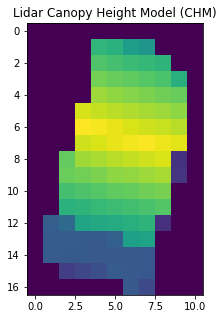

In [369]:
fig, ax = plt.subplots(figsize=(10, 5))

chm_plot = ax.imshow(chm_masked)

ax.set_title("Lidar Canopy Height Model (CHM)")


plt.show()


In [370]:
fig = go.Figure(data=go.Surface(z=chm_masked))

fig.update_layout(title='3D Canopy Height Model')

fig.show()